In [ ]:
from scripts.gpx_parser import GPXParser
from scripts.profile import ElevationProfile
import matplotlib.pyplot as plt

In [2]:
parser = GPXParser("sample_data/cycling_track.gpx")
track_df = parser.parse_to_dataframe()

profile = ElevationProfile(track_df)

In [3]:
climbs = profile.detect_climbs()
climbs

,start_idx,end_idx,start_km,end_km,length_m,gain_m,avg_grade_pct,max_grade_pct,start_lat,start_lon,end_lat,end_lon
0,463,500,11.578247,12.720534,1142.3,32.5,2.8,13.2,50.823883,19.201917,50.834019,19.203694
1,793,874,21.192824,23.302392,2109.6,91.9,4.4,18.0,50.822244,19.294359,50.806274,19.308128
2,1048,1082,28.517924,29.536562,1018.6,33.6,3.3,6.0,50.780274,19.363488,50.775118,19.374669
3,1651,1686,46.933177,47.916237,983.1,51.9,5.3,26.4,50.695539,19.494900,50.691648,19.507234
4,1729,1814,49.191974,51.694168,2502.2,92.6,3.7,20.0,50.689223,19.522083,50.671721,19.506894
5,1900,1967,54.187004,55.870161,1683.2,79.9,4.7,11.6,50.660498,19.492455,50.659311,19.471765
6,2092,2169,59.645915,61.644469,1998.6,70.5,3.5,10.5,50.660117,19.436615,50.654955,19.413753
7,2289,2338,65.369428,66.708725,1339.3,47.0,3.5,8.1,50.667700,19.378422,50.666832,19.361880
8,2578,2643,73.717972,75.751856,2033.9,52.0,2.6,6.6,50.689427,19.288280,50.706240,19.282423


In [4]:
profile.compute_slope_lengths()

c:\Users\Michal\Desktop\Orbita 25\GPX-analyzer\scripts\elevation_profile.py:152: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("slope_range")["delta_km"]


,slope_range,length_km,% of total
0,< 2%,88.87,84.30
1,2 ~ 4%,10.71,10.16
2,4 ~ 6%,3.68,3.49
3,6 ~ 8%,1.85,1.75
4,>= 8%,0.32,0.30


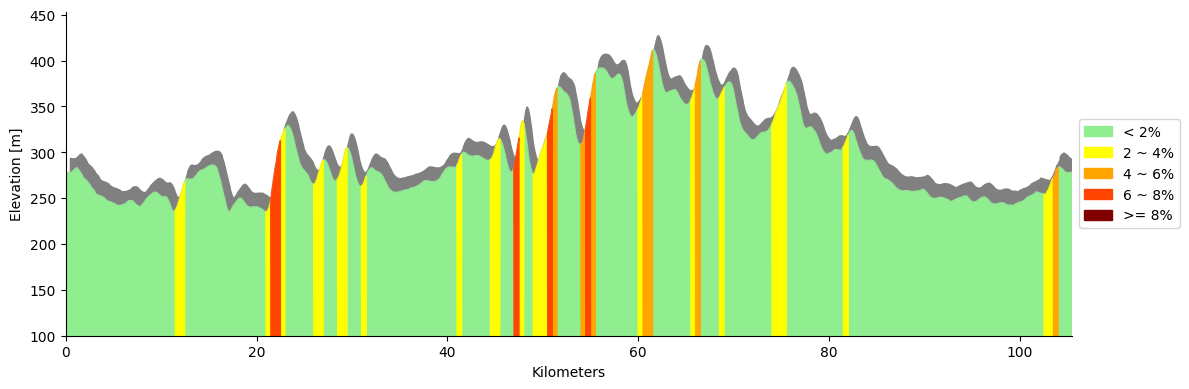

In [5]:
plot = profile.plot_profile()
plt.show()

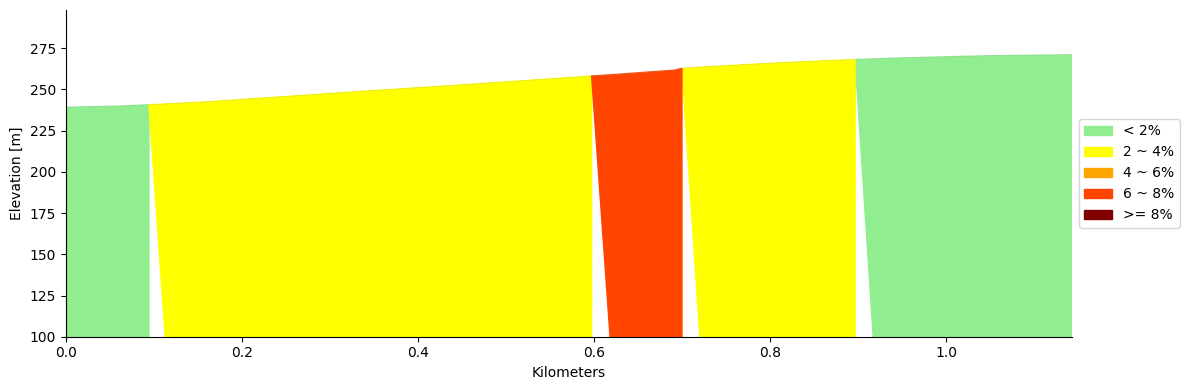

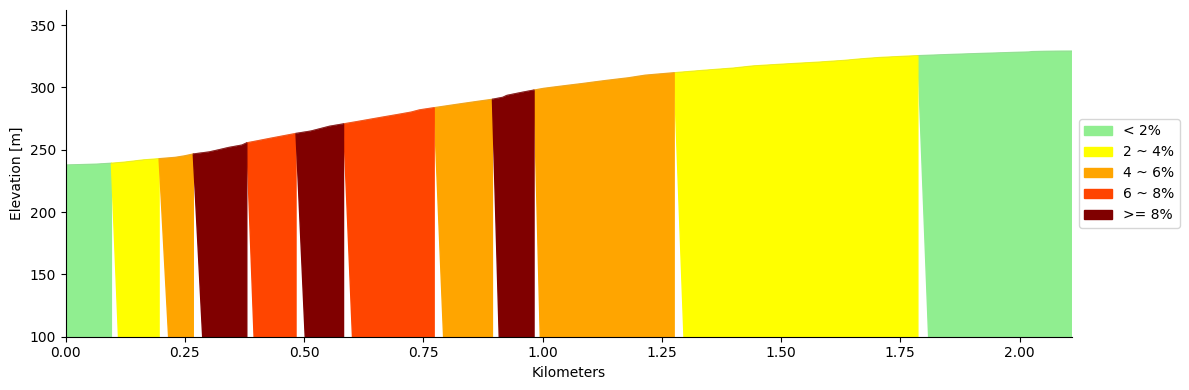

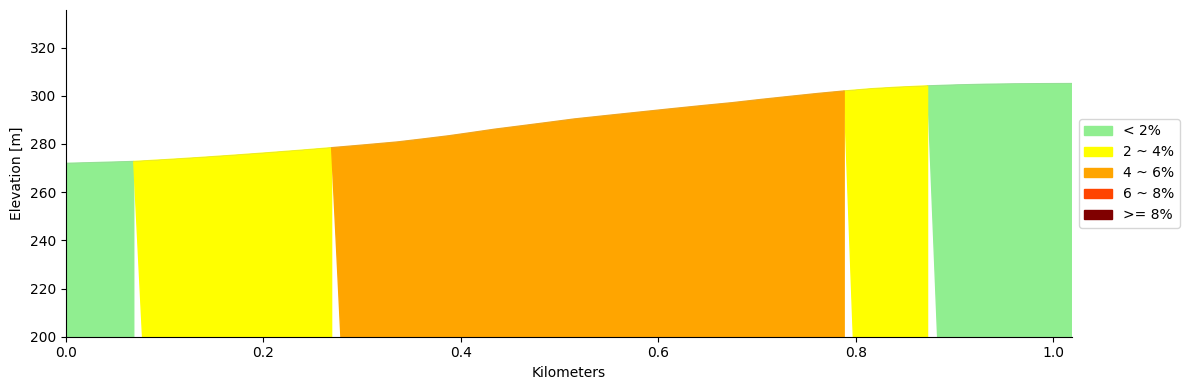

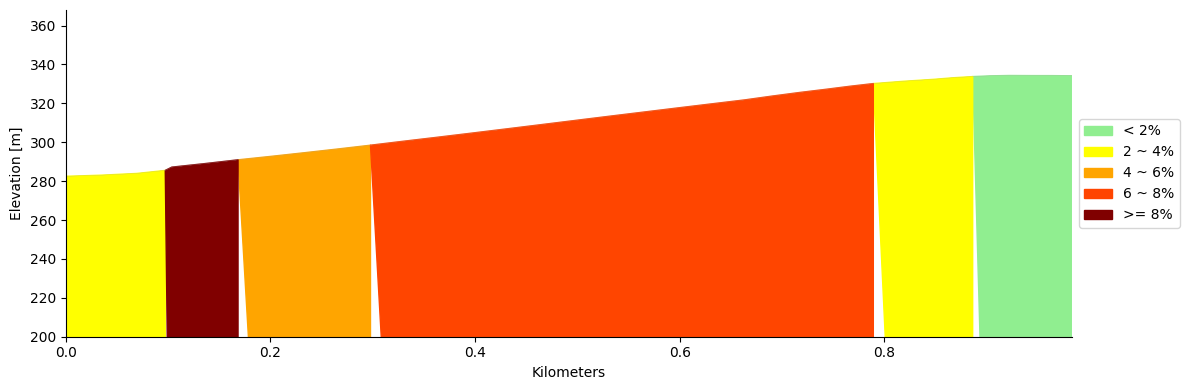

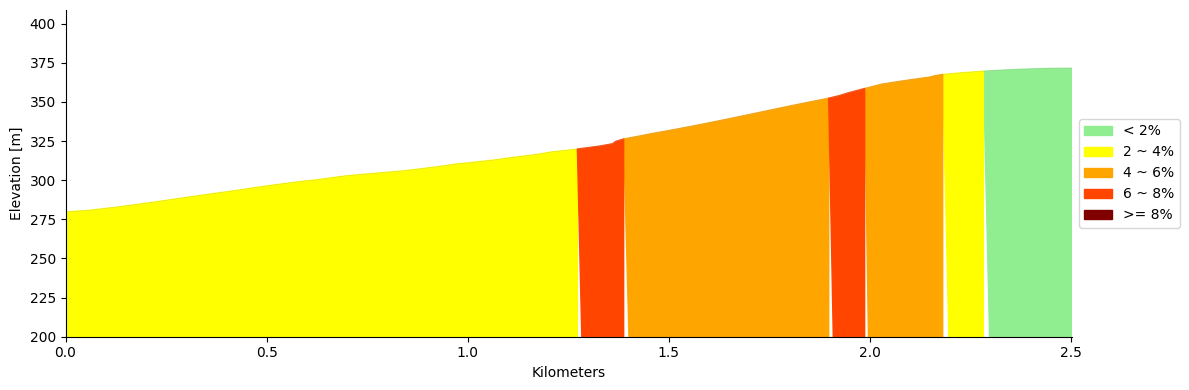

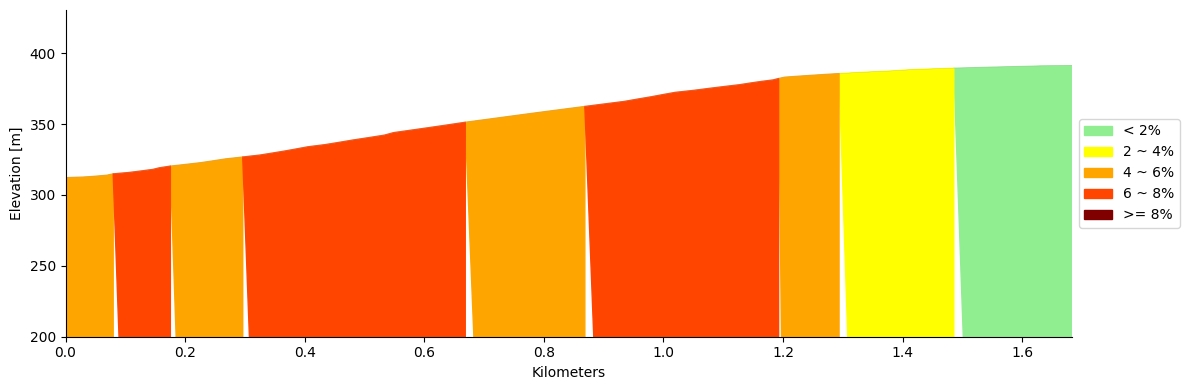

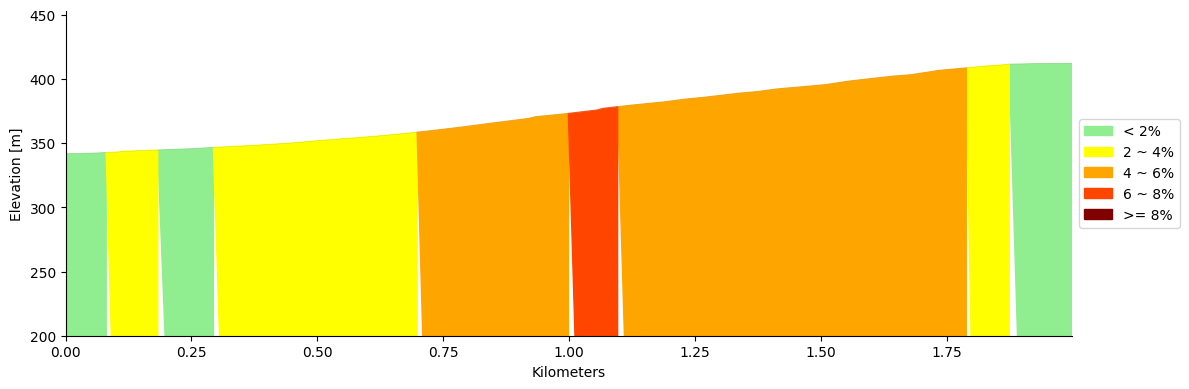

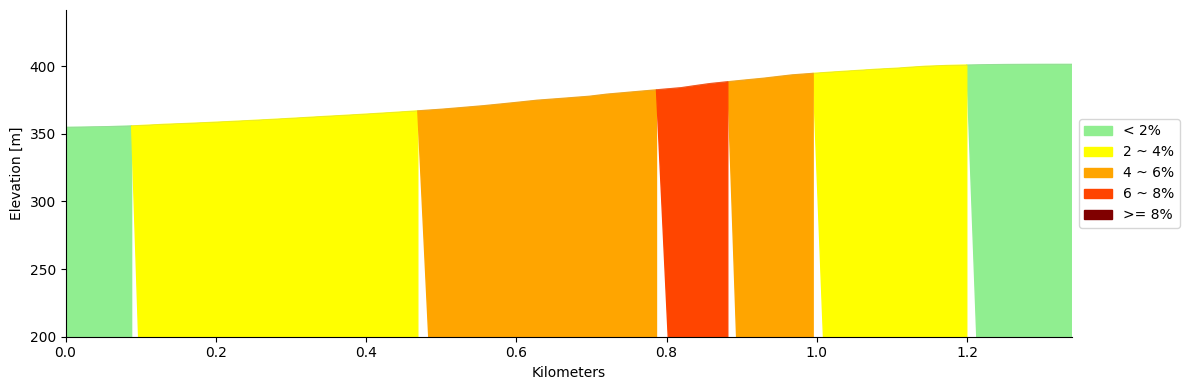

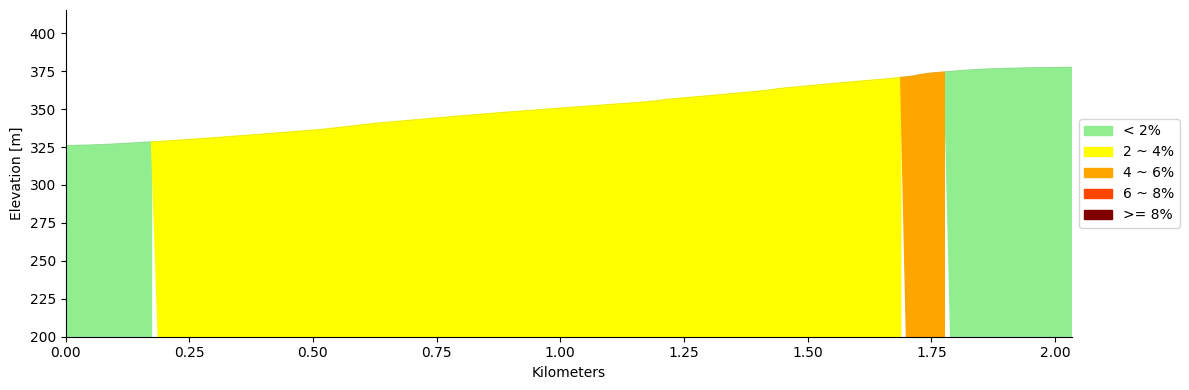

In [6]:
# elevation profile for each climb
for i, row in enumerate(climbs.itertuples()):
    climb_df = track_df.iloc[
        track_df['km'].sub(row.start_km).abs().idxmin():
        track_df['km'].sub(row.end_km).abs().idxmin() + 1
    ].reset_index(drop=True)

    climb_df["km"] -= climb_df["km"].iloc[0]
    climb_profile = ElevationProfile(climb_df, seg_unit_km=0.1)
    fig_c, ax_c = climb_profile.plot_profile(
        show_labels=False,
        show_background=False
        )